In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
df=pd.read_csv("CAR DETAILS FROM CAR DEKHO.csv")

In [4]:
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


In [5]:
import matplotlib.pyplot as plt

In [6]:
%matplotlib inline

In [7]:
df1=df[["selling_price","km_driven"]]

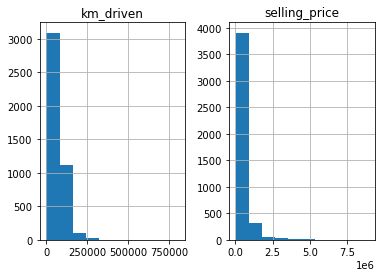

In [8]:
df1.hist()
plt.show()

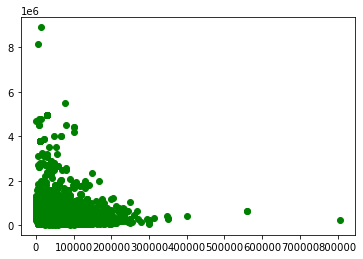

In [9]:
plt.scatter(df.km_driven,df.selling_price,color="green")
plt.ylabel="selling_price"
plt.xlabel="km_driven"
plt.show()

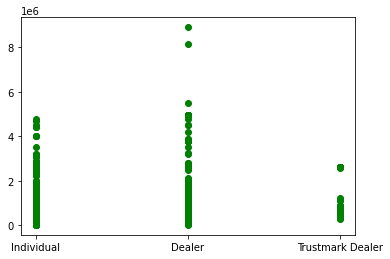

In [10]:
plt.scatter(df.seller_type,df.selling_price,color="green")
plt.ylabel="selling_price"
plt.xlabel="seller_type"
plt.show()

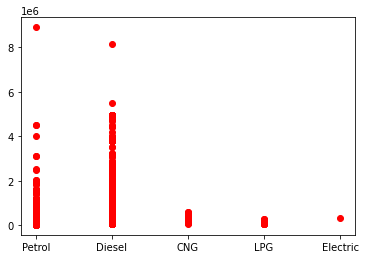

In [11]:
plt.scatter(df.fuel,df.selling_price,color="red")
plt.xlabel="fuel"
plt.ylabel="selling price"
plt.show()

In [12]:
cdf=df

In [13]:
mask=np.random.rand(len(df))<0.8

In [14]:
train=cdf[mask]
test=cdf[~mask]

In [15]:
train.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [16]:
test.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
5,Maruti Alto LX BSIII,2007,140000,125000,Petrol,Individual,Manual,First Owner
10,Chevrolet Sail 1.2 Base,2015,260000,35000,Petrol,Individual,Manual,First Owner
16,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
30,Mercedes-Benz New C-Class 220 CDI AT,2013,1425000,59000,Diesel,Dealer,Automatic,First Owner
42,Hyundai i10 Magna 1.1L,2014,229999,60000,Petrol,Individual,Manual,Fourth & Above Owner


In [17]:
from sklearn import linear_model
regr=linear_model.LinearRegression()

In [18]:
train_x=np.asanyarray(train[["km_driven"]])

In [19]:
train_y=np.asanyarray(train[["selling_price"]])

In [20]:
regr.fit(train_x,train_y)

LinearRegression()

In [21]:
print("coefficient :",regr.coef_)

coefficient : [[-2.27101627]]


In [22]:
print("intercept :",regr.intercept_)

intercept : [654753.9434779]


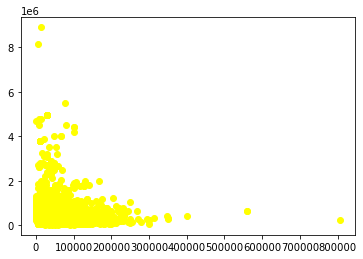

In [23]:
plt.scatter(train.km_driven,train.selling_price,color="yellow")

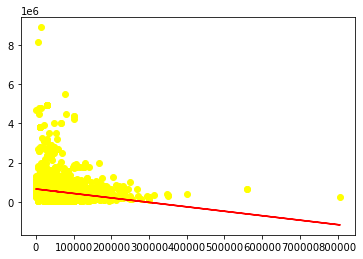

In [25]:
plt.scatter(train.km_driven,train.selling_price,color="yellow")
plt.plot(train_x,regr.intercept_[0]+train_x*regr.coef_[0][0],"-r")

In [28]:
from sklearn.metrics import r2_score
test_x=np.asanyarray(test[["km_driven"]])
test_y=np.asanyarray(test[["selling_price"]])
test_yhat=regr.predict(test_x)

print("Mean Absolute Error : %.2f " % np.mean(np.absolute(test_yhat-test_y)))
print("Mean squared error : %.2f" % np.mean(test_yhat-test_y)**2)
print("R square score : %.2f" %r2_score(test_y,test_yhat))

Mean Absolute Error : 314441.39 
Mean squared error : 1560149.68
R square score : 0.05
